In [456]:
import pandas as pd
pd.set_option('display.float_format', '{:.20f}'.format)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

import numpy as np
import math

import warnings
warnings.filterwarnings("ignore")


import sys
sys.path.append(r"src/") 

import EDA

from sklearn.preprocessing import MinMaxScaler # normalization

#Plotting
import missingno as msno
import seaborn as sns
sns.set_theme(style="whitegrid", palette="Set2")


import matplotlib.pyplot as plt


# Machine Learning - Supervised learning - Classification

`Problem Statement`:


    Predict the potential churn customers based on numerical and categorical features.
    


Customer churn is of utmost importance for businesses due to the fact that retaining existing customers is generally more lucrative than acquiring new ones. Loyal customers are known to spend more and are also more likely to refer others to the company.

In the telecommunications industry, the cost difference between acquiring a new customer and retaining an existing one can be substantial. According to some estimates, it can be up to five times more expensive than retaining an existing one. This is because attracting new customers often requires significant marketing and advertising expenses, as well as the cost of providing incentives to entice them to switch from a competitor. In contrast, retaining existing customers generally involves providing good customer service, resolving any issues they may have, and providing them with incentives to stay with the company, such as loyalty programs or discounts.

Furthermore, in the telecom industry, there is often a high level of competition and low switching costs, meaning that customers can easily switch to a competitor if they are dissatisfied. Therefore, retaining existing customers is crucial for telecom companies to maintain their market share and profitability.

# Telco customer Churn Prediction

This sample data module tracks a fictional telco company's customer churn based on various factors
The data set includes mainly information about:

    - Customers who left within the last month: the column is called Churn
    - Services that each customer has signed up for: phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    - Customer account information: how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    - Demographic info about customers: gender, age range, and if they have partners and dependents


## Exploratory Data Analysis

In [457]:
df = pd.read_csv(r"C:\Users\Nicolas\Documents\ironhack_bootcamp\projects\telco_churn_project\data.xls") 
data_dict = pd.read_excel(r"C:\Users\Nicolas\Documents\ironhack_bootcamp\projects\telco_churn_project\data_dict.xlsx") 
# https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [458]:
data_dict

,Feature,Description
0,Customer ID,Contains customer ID
1,gender,Whether the customer is a male or a female
2,SeniorCitizen,"Whether the customer is a senior citizen or not (1, 0)"
3,Partner,"Whether the customer has a partner or not (Yes, No)"
4,Dependents,"Whether the customer has dependents or not (Yes, No)"
5,tenure,Number of months the customer has stayed with the company
6,PhoneService,"Whether the customer has a phone service or not (Yes, No)"
7,MultipleLines,"Whether the customer has multiple lines or not (Yes, No, No phone service)"
8,InternetService,"Customer’s internet service provider (DSL, Fiber optic, No)"
9,OnlineSecurity,"Whether the customer has online security or not (Yes, No, No internet service)"


In [459]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85000000000000142109,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95000000000000284217,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85000000000000142109,108.15,Yes


In [460]:
EDA.summary_statistics(df)

,null_%,null_count,dtype,count,mean,std,min,25%,50%,75%,max
index,,,,,,,,,,,
SeniorCitizen,0.00000000000000000000,0,int64,7043,0.16000000000000000333,0.36999999999999999556,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000
tenure,0.00000000000000000000,0,int64,7043,32.36999999999999744205,24.55999999999999872102,0.00000000000000000000,9.00000000000000000000,29.00000000000000000000,55.00000000000000000000,72.00000000000000000000
MonthlyCharges,0.00000000000000000000,0,float64,7043,64.76000000000000511591,30.08999999999999985789,18.25000000000000000000,35.50000000000000000000,70.34999999999999431566,89.84999999999999431566,118.75000000000000000000
customerID,0.00000000000000000000,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,0.00000000000000000000,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,0.00000000000000000000,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contract,0.00000000000000000000,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StreamingMovies,0.00000000000000000000,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StreamingTV,0.00000000000000000000,0,object,7043,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    Total Charges has the wrong datatype, which is hiding the presence of nulls in the form of white spaces.


### Missing values and duplicated rows

In [461]:
# Changing TotalCharges to float and replacing spaces with Nulls to be treated accordingly
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].replace(" ",np.nan)).astype(float) 

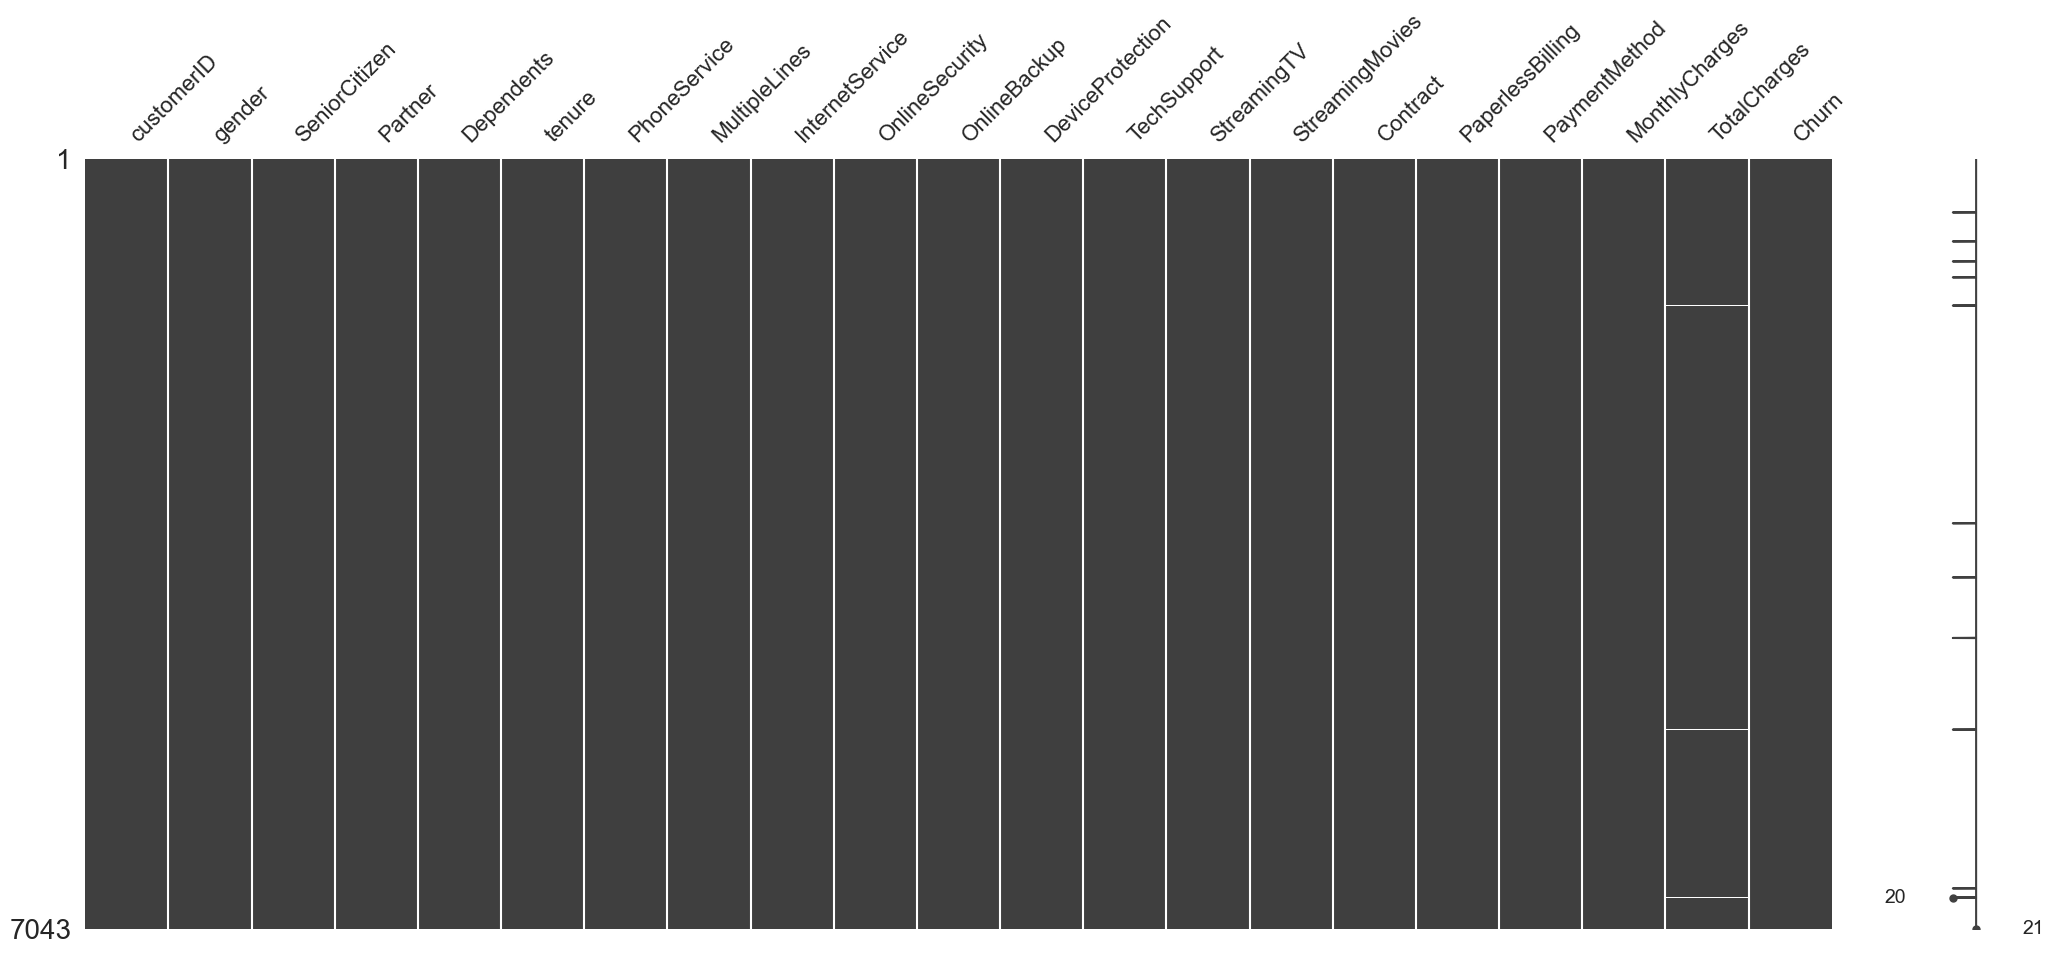

In [462]:
msno.matrix(df);

- 7043 observations 
- There are null values in TotalCharges that will be handled using the relationship between `tenure` and `MonthlyCharges`
- Other than `tenure`, `MonthlyCharges` and `TotalCharges`, all variables are categorical.

In [463]:
#Given that TotalCharges should be aproximatelly monthly charges multiplied by the tenure in years, i will complete the dataset using this logic
df["TotalCharges"] = df.apply(lambda row: row["MonthlyCharges"]*row["tenure"] if (math.isnan(row["TotalCharges"])) else row["TotalCharges"],axis=1)
df["TotalCharges"].isna().sum()
#With the same reasoning, i'll check for multicollinearity between monthly changes and totalcharges afterwards

0

#### Duplicate rows

In [464]:
#Duplicate Rows Count
print(f"{df.shape[0] - df.drop_duplicates().shape[0]} duplicate rows found")

0 duplicate rows found


In [465]:
df.drop("customerID",axis=1,inplace=True) #CustomerID row not necesarry for modelling

## Descriptive statistics

### Numerical Variables

- There are only 3 numerical variables, and there's a logical linear relationship between monthly charges , tenure and total charge
- Although MonthlyCharges*tenure is logically correlated to TotalCharges. Will create new variable with the difference and drop TotalCharges to avoid multicollineality problems.

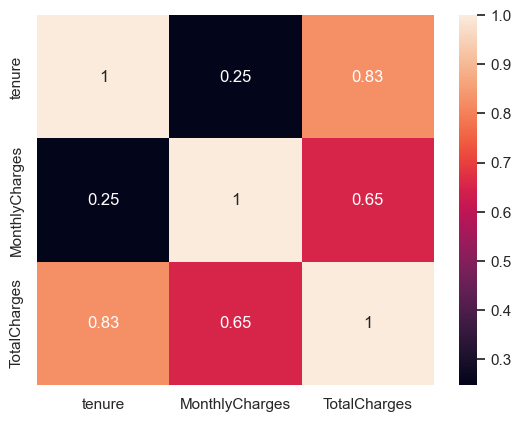

In [466]:
sns.heatmap(df.drop("SeniorCitizen", axis=1).corr(), annot=True, vmax=1);

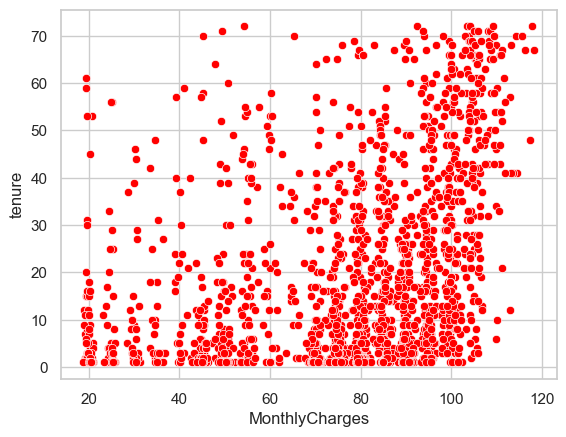

In [467]:
sns.scatterplot(df[df["Churn"]=="Yes"],x="MonthlyCharges",y="tenure",color="red");

#### No clear relationship

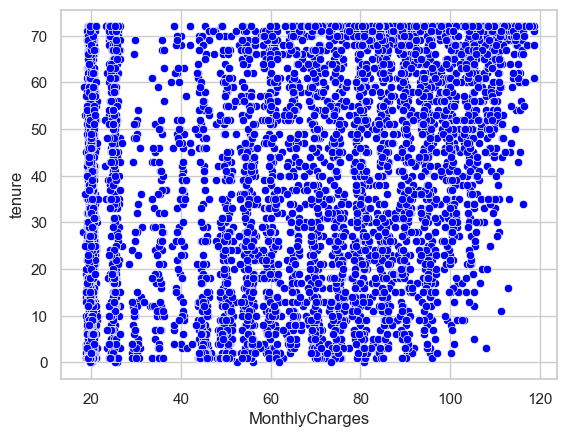

In [468]:
sns.scatterplot(df[df["Churn"]=="No"],x="MonthlyCharges",y="tenure",color="blue");

### Shapiro-Wilk test and the Anderson-Darling test (normality)

    For sample sizes larger than 5000, both tests are generally considered to be reliable and accurate, but the Anderson-Darling test tends to be more powerful and sensitive than the Shapiro-Wilk test, especially for larger sample sizes.
    Therefore, if you have a sample size larger than 5000 and you want a more powerful test, you may prefer to use the Anderson-Darling test over the Shapiro-Wilk test. 

    It is still recommended to visually inspect the data as well, such as using a histogram or Q-Q plot, to check for normality even if the statistical test indicates normality.

#### `tenure` , not gaussian

In [469]:
EDA.anderson_normality_test(df["tenure"])

Test statistic: 203.2354707966997
Critical value at 5%: 0.656
Data does not look Gaussian (reject H0)


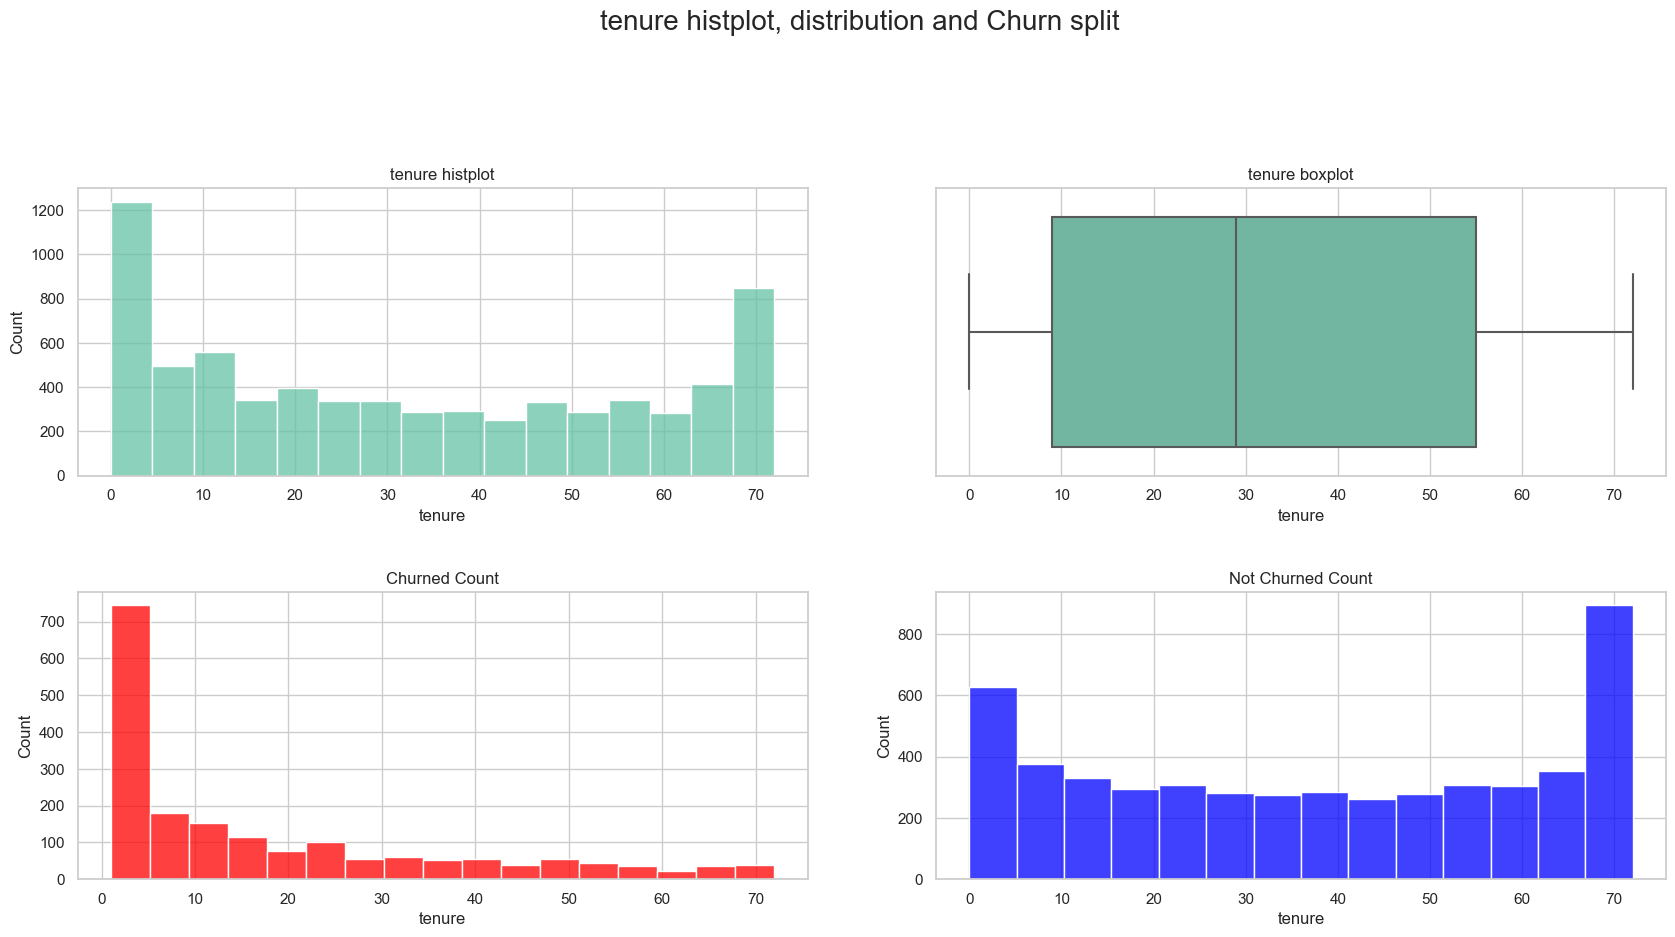

In [470]:
EDA.numeric_plots("tenure",df)

- distribution concentrates values on the extremes (min/max)
- There's a clear concentration on churned users on the min tenure values vs non churned users who have spikes both at min and max values
    - this suggests tenure could be a relevant feature to predict Churn

#### `MonthlyCharges` , not gaussian

In [471]:
EDA.anderson_normality_test(df["MonthlyCharges"])

Test statistic: 170.555235072914
Critical value at 5%: 0.656
Data does not look Gaussian (reject H0)


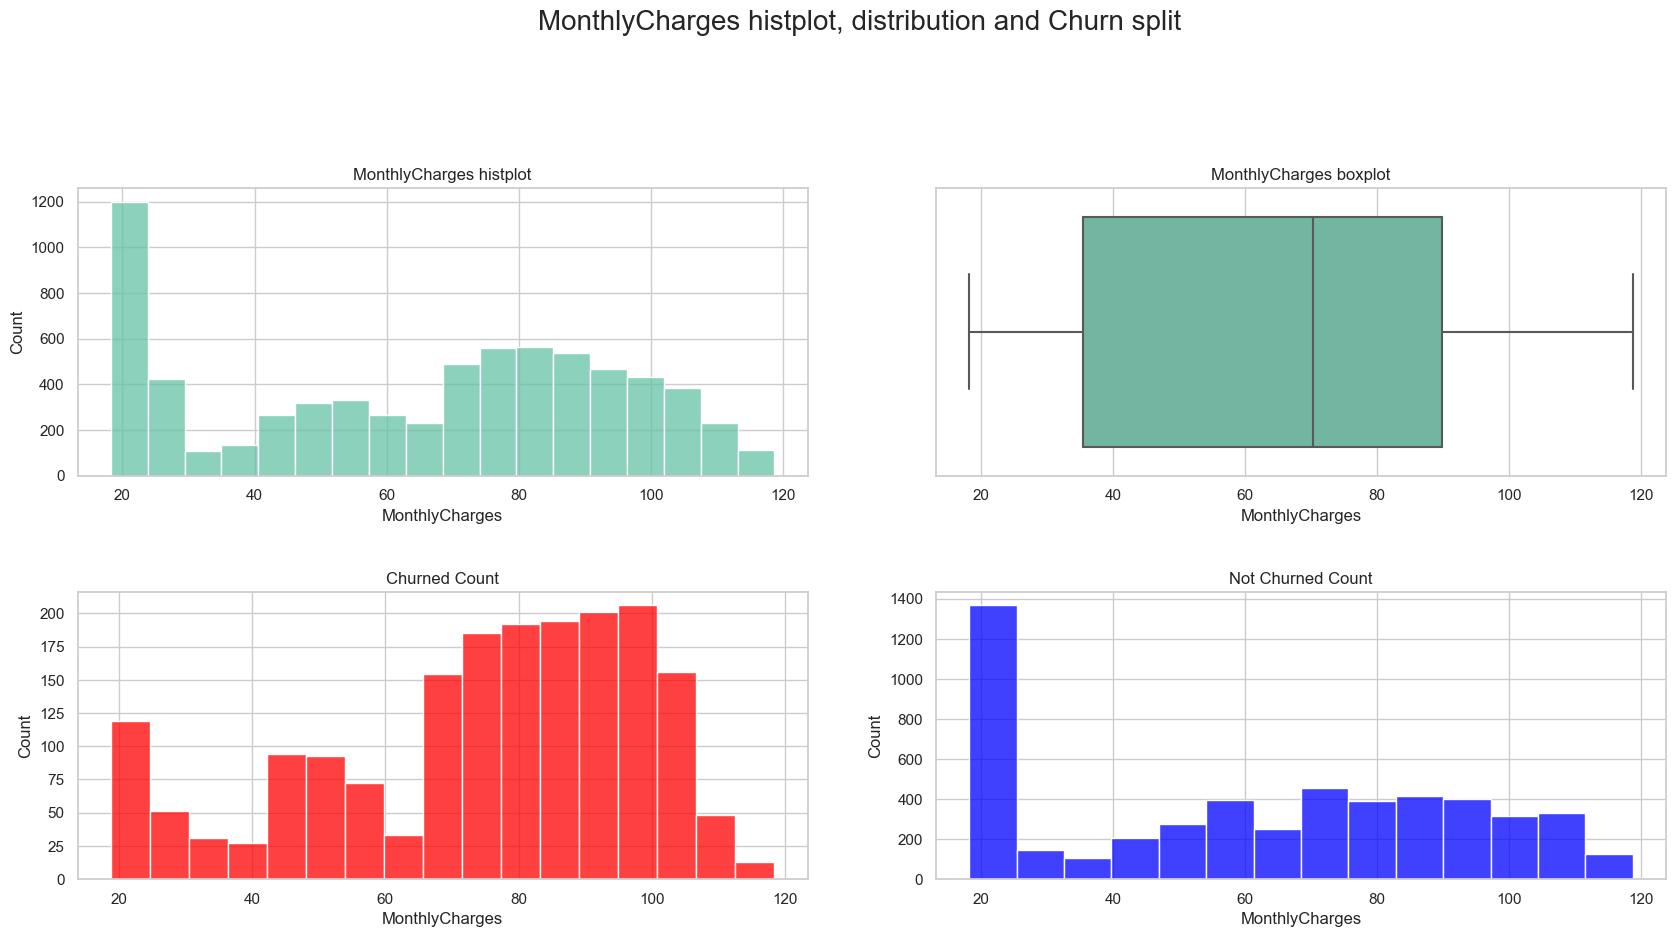

In [472]:
EDA.numeric_plots("MonthlyCharges",df)

- There's concentration or churned users within the 60-110 monthly charges rate, seems relevant to segment clients correctly in order to address clients with a higher price-sensitivity in a more personalized way

#### `TotalCharges` , not gaussian

In [473]:
EDA.anderson_normality_test(df["TotalCharges"])

Test statistic: 346.6380297042033
Critical value at 5%: 0.656
Data does not look Gaussian (reject H0)


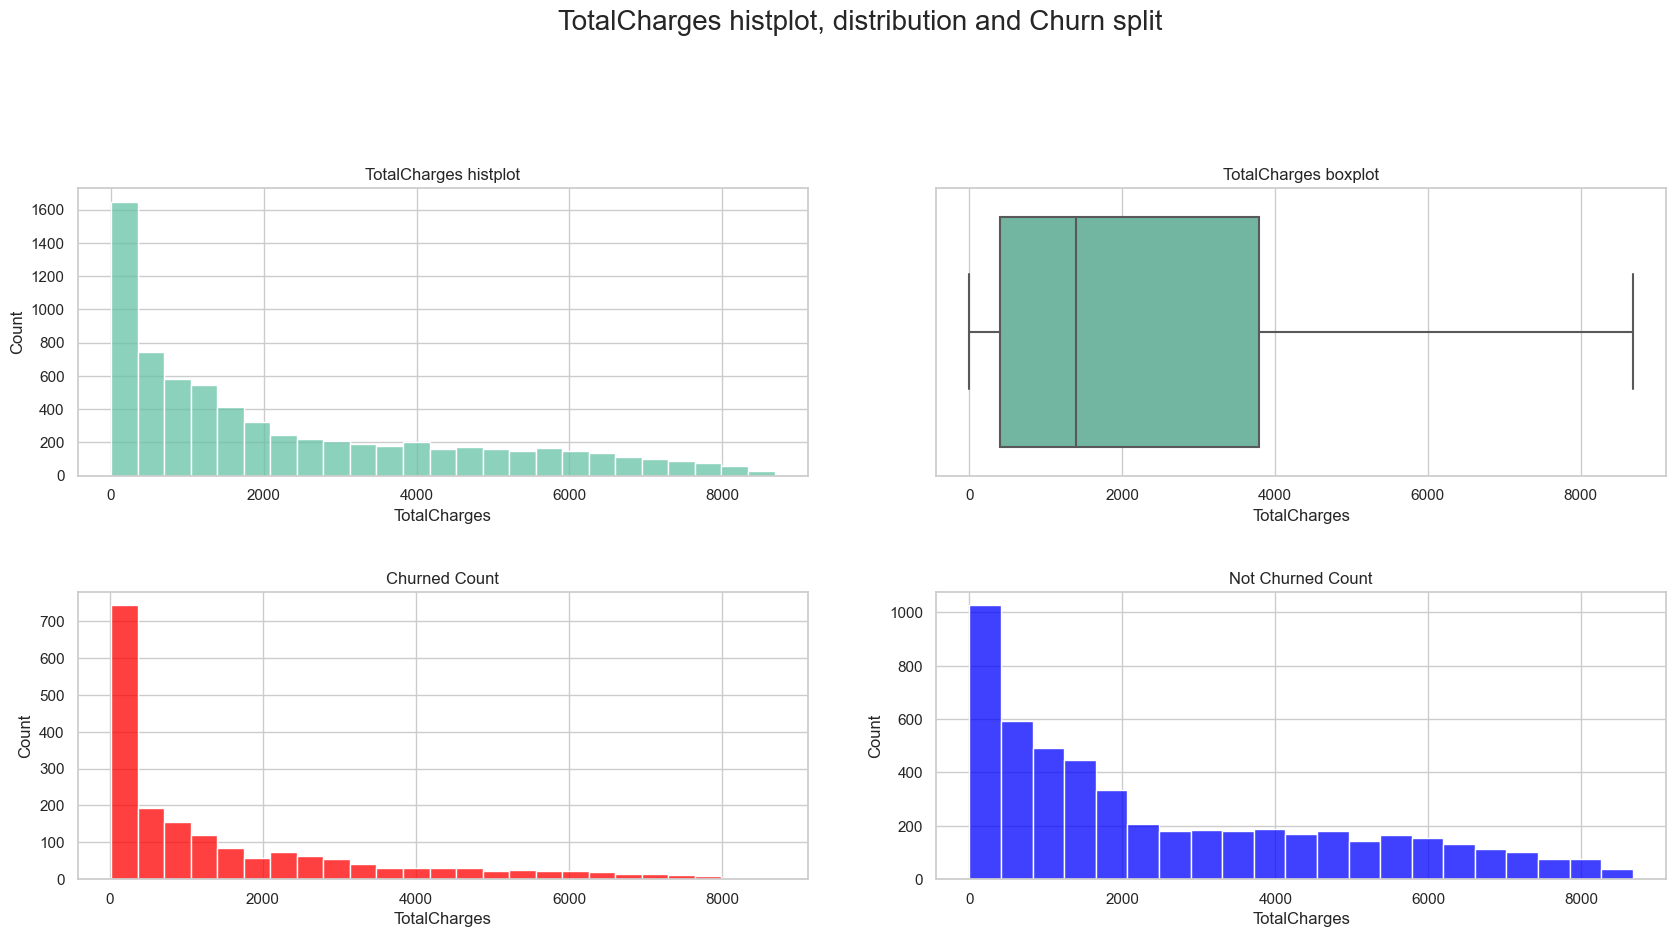

In [474]:
EDA.numeric_plots("TotalCharges",df)

#### `ExtraChargesEstimate` , not gaussian

In [475]:
df["ExtraChargesEstimate"] = (df["TotalCharges"]-df["MonthlyCharges"]*df["tenure"])/12

In [476]:
EDA.anderson_normality_test(df["ExtraChargesEstimate"])

Test statistic: 130.869284893427
Critical value at 5%: 0.656
Data does not look Gaussian (reject H0)


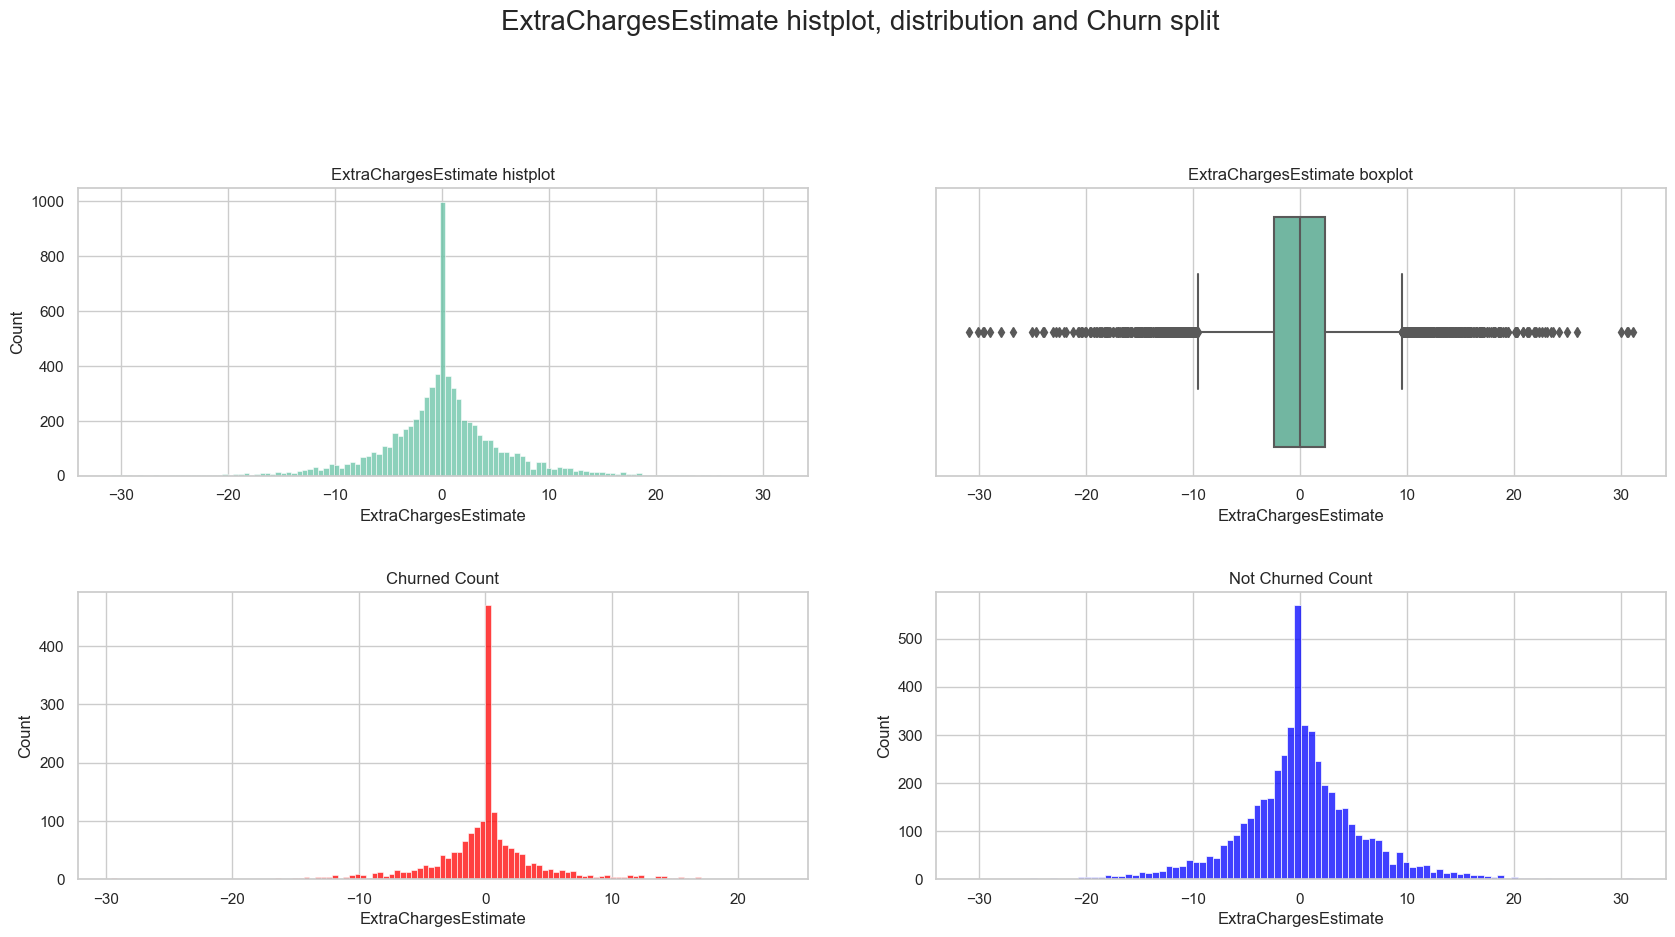

In [477]:
EDA.numeric_plots("ExtraChargesEstimate",df)

### Scaling    
    
    StandardScaler: This scaler transforms the data such that its distribution will have a mean of 0 and a standard deviation of 1. It is a good choice when the data has a Gaussian or normal distribution.

    MinMaxScaler: This scaler scales the data to a fixed range of 0 to 1. It is suitable for data that has a bounded range, for example, image pixel intensities.

    MaxAbsScaler: This scaler scales the data to the range of -1 to 1 by dividing each value by the maximum absolute value in the data. It is suitable for data that has both positive and negative values.

    RobustScaler: This scaler scales the data based on the median and interquartile range, which makes it more robust to outliers in the data. It is a good choice when the data contains outliers.

    PowerTransformer: This scaler applies a mathematical transformation to the data to make it more Gaussian-like. It is useful when the data does not follow a normal distribution.

    QuantileTransformer: This scaler transforms the data to follow a uniform or a normal distribution. It is useful when the data does not follow a normal distribution and when there are outliers.

In [478]:
# will probably try MinMaxScaler and MaxAbsScaler, given that the data is positive, non-Gaussian, and mainly concentrated in the minimum and/or maximum values

In [479]:
scaler = MinMaxScaler()

In [480]:
feat_scale = ["tenure","MonthlyCharges","ExtraChargesEstimate"]

for i in list(feat_scale):
    df[i] = scaler.fit_transform(df[i].values.reshape(-1, 1))

### Categorical Variables

#### Categorical features unique values



In [481]:
val_per_feat = pd.DataFrame(list(zip([i for i in df.columns if df[i].dtype=='object'],[list(df[i].unique()) for i in df.columns if df[i].dtype=='object' ])), columns=["Feature","Values"])
val_per_feat["count_val"] = val_per_feat["Values"].apply(lambda x: len(x))
val_per_feat

,Feature,Values,count_val
0,gender,"[Female, Male]",2
1,Partner,"[Yes, No]",2
2,Dependents,"[No, Yes]",2
3,PhoneService,"[No, Yes]",2
4,MultipleLines,"[No phone service, No, Yes]",3
5,InternetService,"[DSL, Fiber optic, No]",3
6,OnlineSecurity,"[No, Yes, No internet service]",3
7,OnlineBackup,"[Yes, No, No internet service]",3
8,DeviceProtection,"[No, Yes, No internet service]",3
9,TechSupport,"[No, Yes, No internet service]",3


### Categorical Encoding (More than 1 possible option)


#GET DUMMIES
#Dropping one option in binary categorical features to avoid multicollinearity when training the model
bool_list = ["gender_Female","Partner_No","Dependents_No","PhoneService_No","PaperlessBilling_No","Churn_No","TotalCharges"]
df_num = pd.get_dummies(df).drop(bool_list,axis=1)

In [482]:
cat_cols = df.columns[list(df.dtypes=="object")]
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [483]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encode_dict ={}
df_num = df.copy()
text_data_features = [i for i in list(df.columns) if i in cat_cols]


for i in text_data_features :
    df_num[i] = encoder.fit_transform(df_num[i])



In [484]:
df_num

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ExtraChargesEstimate
0,0,0,1,0,0.01388888888888888812,0,1,0,0,2,0,0,0,0,0,1,2,0.11542288557213931099,29.85000000000000142109,0,0.49838731353312620831
1,1,0,0,0,0.47222222222222220989,1,0,0,2,0,2,0,0,0,1,0,3,0.38507462686567162091,1889.50000000000000000000,0,0.43549254132508946613
2,1,0,0,0,0.02777777777777777624,1,0,0,2,2,0,0,0,0,0,1,3,0.35422885572139306554,108.15000000000000568434,1,0.49899207095820347080
3,1,0,0,0,0.62500000000000000000,0,1,0,2,0,2,2,0,0,1,0,0,0.23930348258706463094,1840.75000000000000000000,0,0.41405725036957330421
4,0,0,0,0,0.02777777777777777624,1,0,1,0,0,0,0,0,0,0,1,2,0.52189054726368155901,151.65000000000000568434,1,0.51216234377099745245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.33333333333333331483,1,2,0,2,0,2,2,2,2,1,1,3,0.66218905472636813148,1990.50000000000000000000,0,0.43831474264211722769
7039,0,0,1,1,1.00000000000000000000,1,2,1,0,2,2,0,2,2,1,1,1,0.84527363184079595815,7362.89999999999963620212,0,0.40767369977153389282
7040,0,0,1,1,0.15277777777777776236,0,1,0,2,0,0,0,0,0,0,1,2,0.11293532338308459595,346.44999999999998863132,0,0.52640774089503983291
7041,1,1,1,0,0.05555555555555555247,1,2,1,0,0,0,0,0,0,0,1,3,0.55870646766169163033,306.60000000000002273737,1,0.51048246203467173565


## Feature Engineering

### Correlation

    Avoiding Multicollinearity:

TotalCharges has a high correlation with tenure (Logical)
TotalCharges has a high correlation with Monthly charges

TotalCharges should be dropped, as it doesn't add additional info and its correlated with other variables `(TotalCharges = MontlyCharges * Tenure + ExtraChargesEstimate)`.

<Axes: >

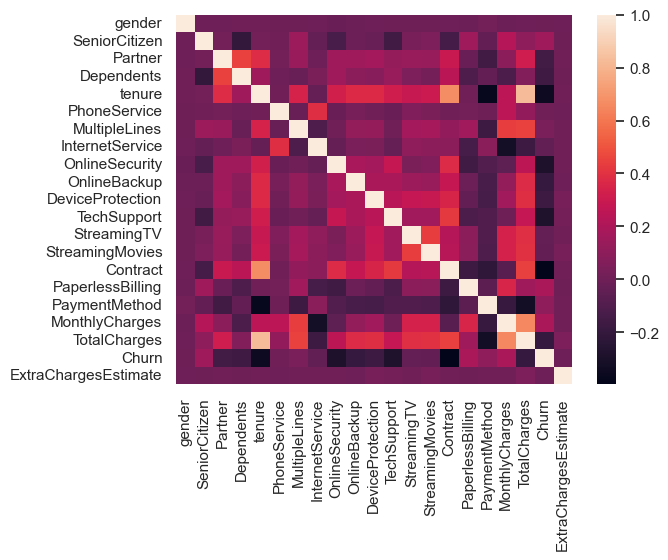

In [485]:
sns.heatmap(df_num.corr(), annot=False, vmax=1)


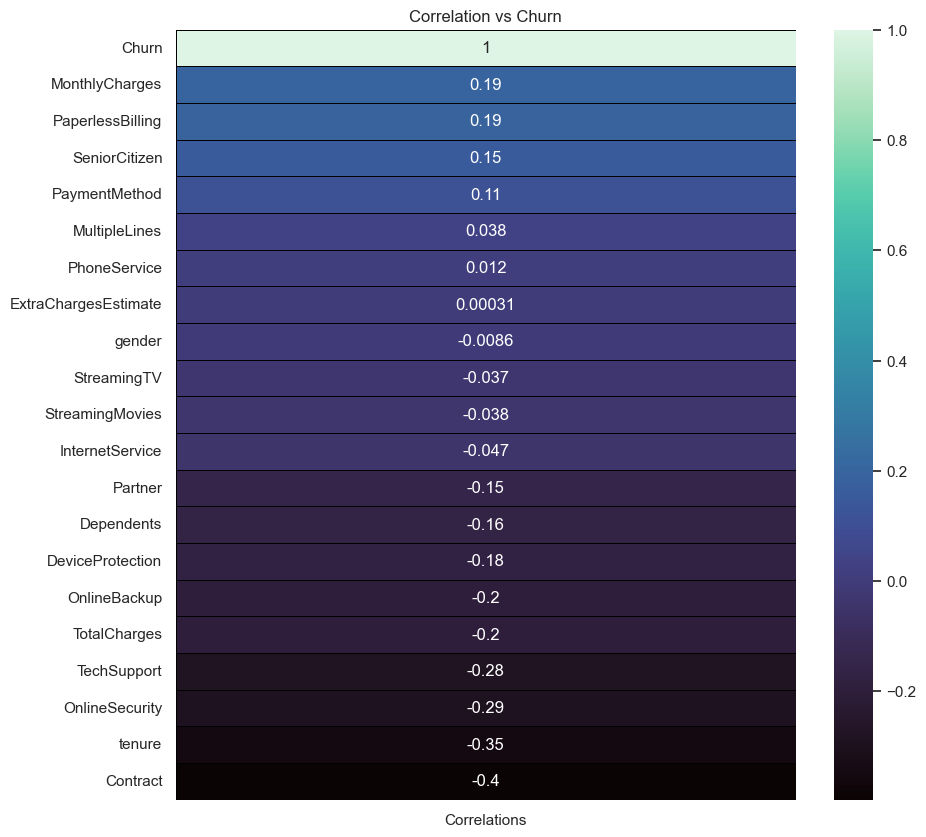

In [486]:
corr_var = df_num.corrwith(df_num['Churn']).sort_values(ascending = False).to_frame()
corr_var.columns = ['Correlations']
plt.subplots(figsize = (10,10))
sns.heatmap(corr_var,annot = True,linewidths = 0.4,linecolor = 'black',cmap="mako");
plt.title('Correlation vs Churn');

The following features show a very low level of correlation:

    - Multiple lines
    - Phone Service
    - ExtraChargesEstimate
    - Gender
    - StreamingTV
    - StreamingMovies
    - Internet service

### Testing Significance for Categorical Variables: Chi-Squared test

The chi-squared test is a statistical test that can be used to determine if there is a relationship between two categorical variables. It is often used to test the independence between a categorical feature and a categorical target variable in a classification problem.

- `PhoneService` and `Gender` have a P-Value less than 5%, suggesting that they shouldn't be considered


In [487]:
from scipy.stats import chi2_contingency

chi_p_val_list = []


for i in cat_cols.drop("Churn"):
# Create a contingency table
    contingency_table = pd.crosstab(df_num[i], df_num['Churn'])

    # Calculate the chi-squared test statistic, p-value, degrees of freedom, and expected frequencies
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    chi_p_val_list.append(p)

chi_table = pd.DataFrame({"feature":cat_cols.drop("Churn"),"p_value":chi_p_val_list}).sort_values("p_value")
chi_table[chi_table["p_value"]>0.05]



,feature,p_value
3,PhoneService,0.33878253580669281941
0,gender,0.48657873605618595647


### Testing Significance for Numerical Variables: ANOVA

The chi-squared test is a statistical test that can be used to determine if there is a relationship between two categorical variables. It is often used to test the independence between a categorical feature and a categorical target variable in a classification problem.

- `PhoneService` and `Gender` have a P-Value less than 5%, suggesting that they shouldn't be considered


In [488]:
from sklearn.feature_selection import f_classif


# extract the numerical features and target
X = df_num.loc[:, ~df_num.columns.isin(cat_cols)]  # Features 
y = df_num['Churn']  # Target variable

# perform ANOVA using f_classif
f_values, p_values = f_classif(X, y)

# print the results
for i in range(len(f_values)):
    print(f"Feature {i+1}: F-value = {f_values[i]}, p-value = {p_values[i]}")

Feature 1: F-value = 164.04142445613567, p-value = 3.839860055795412e-37
Feature 2: F-value = 997.2680104991505, p-value = 7.999057960585883e-205
Feature 3: F-value = 273.4637042077206, p-value = 2.706645606885165e-60
Feature 4: F-value = 288.2789610222167, p-value = 2.1272116132402228e-63
Feature 5: F-value = 0.0006631511341775464, p-value = 0.979456099901503


In [489]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ExtraChargesEstimate
0,0,0.01388888888888888812,0.11542288557213931099,29.85000000000000142109,0.49838731353312620831
1,0,0.47222222222222220989,0.38507462686567162091,1889.50000000000000000000,0.43549254132508946613
2,0,0.02777777777777777624,0.35422885572139306554,108.15000000000000568434,0.49899207095820347080
3,0,0.62500000000000000000,0.23930348258706463094,1840.75000000000000000000,0.41405725036957330421
4,0,0.02777777777777777624,0.52189054726368155901,151.65000000000000568434,0.51216234377099745245
...,...,...,...,...,...
7038,0,0.33333333333333331483,0.66218905472636813148,1990.50000000000000000000,0.43831474264211722769
7039,0,1.00000000000000000000,0.84527363184079595815,7362.89999999999963620212,0.40767369977153389282
7040,0,0.15277777777777776236,0.11293532338308459595,346.44999999999998863132,0.52640774089503983291
7041,1,0.05555555555555555247,0.55870646766169163033,306.60000000000002273737,0.51048246203467173565


### Dropping non significant features:



In [490]:
df_num = df_num.drop(columns=['MultipleLines','PhoneService','ExtraChargesEstimate','gender','StreamingTV','StreamingMovies','StreamingMovies','TotalCharges'])

In [491]:
df_num.to_csv("preprocessed_df.csv")

### Target Variable: the imbalance problem

    This classification task has a clear problem: the number of churned customers is much smaller than the number of non-churned customers. This can lead to biased models that predict the majority class more frequently. Several techniques such as oversampling, undersampling, and cost-sensitive learning will be analyzed to mitigate this problem and improve the accuracy of the models.

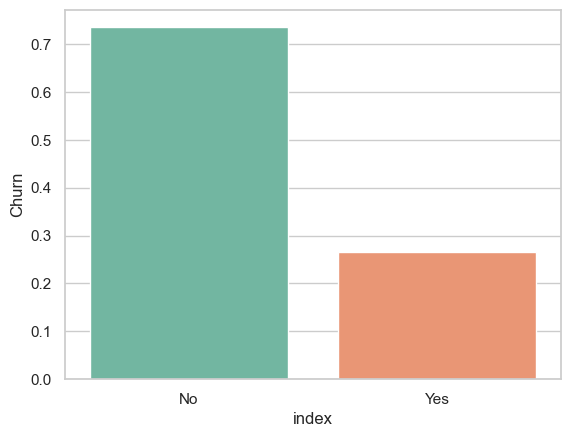

In [492]:
sns.barplot(data=df.Churn.value_counts(normalize=True).reset_index(), x="index", y="Churn");

### Oversampling/Undersampling 
    Oversampling - 3 possible options: Base scenario (no Over-Sampling), SMOTE with sampling_strategy=0.5 ,SMOTE with sampling_strategy=1
    Undersampling - Random Undersampling

#### SMOTE 

    SMOTE (Synthetic Minority Over-sampling Technique) is an algorithm for oversampling imbalanced datasets, which involves creating synthetic examples of the minority class to balance the number of examples between classes.

    SMOTE works by generating synthetic examples in feature space rather than simply duplicating existing examples. It does this by selecting a minority class example at random and finding its k-nearest neighbors (usually k=5), then randomly selecting one of the neighbors and interpolating a new example between the two. The new example is created by selecting random values for each feature between the two examples and is added to the dataset as a new example of the minority class.

    The oversampling ratio of the minority class can be controlled using the sampling_strategy parameter in the SMOTE function. For example, setting sampling_strategy=0.5 will create new examples until the minority class is at 50% of the size of the majority class.

#### UnderSampling

    Random undersampling is a technique used to balance the class distribution by removing some examples from the majority class at random until the desired balance is achieved.

    RandomUnderSampler works by randomly selecting a subset of examples from the majority class that is equal in size to the minority class, thereby creating a balanced dataset. This can be done either by specifying the desired sampling ratio, or by setting the sampling strategy to 'auto' which will undersample the majority class to the size of the minority class.

    in this case, i'll undersample the majority class to the size of the minority class.

Over/under sampling should only be done on the training data, and not on the test or validation data. The reason for this is to avoid introducing bias into the model evaluation process and to ensure that the model's performance on unseen data is accurately estimated.

In [493]:
df_num.head(1)

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,0.01388888888888888812,0,0,2,0,0,0,1,2,0.11542288557213931099,0


In [494]:
from sklearn.model_selection import train_test_split

X = df_num.drop('Churn', axis=1)  # Features
y = df_num['Churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [495]:
from imblearn.over_sampling import SMOTE

In [496]:
oversample = SMOTE(sampling_strategy=0.5)
X_resampled_05, y_resampled_05 = oversample.fit_resample(X_train, y_train)

In [497]:
oversample = SMOTE()
X_resampled_1, y_resampled_1 = oversample.fit_resample(X_train, y_train)

<Axes: xlabel='Churn', ylabel='count'>

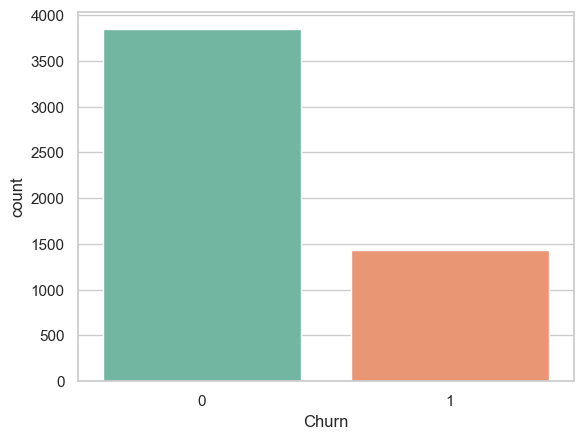

In [498]:
sns.countplot(x=y_train)

<Axes: xlabel='Churn', ylabel='count'>

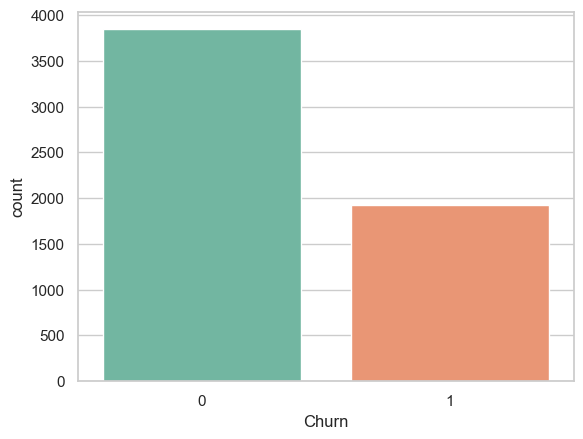

In [499]:
sns.countplot(x=y_resampled_05)

<Axes: xlabel='Churn', ylabel='count'>

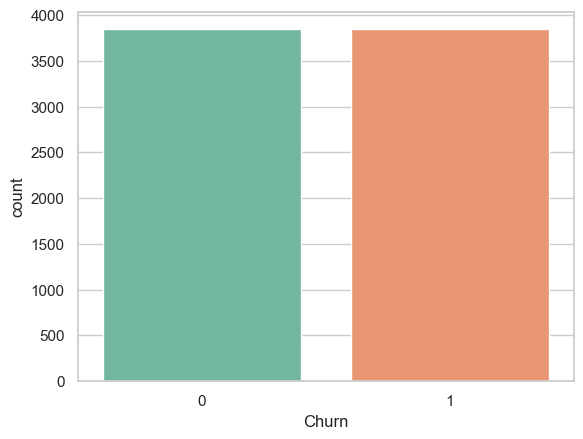

In [500]:
sns.countplot(x=y_resampled_1)

<Axes: xlabel='Churn', ylabel='count'>

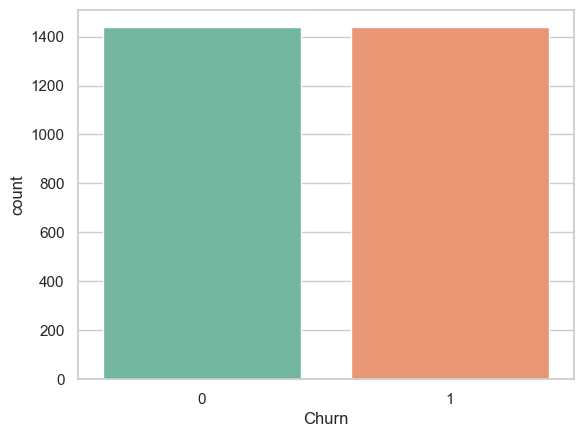

In [501]:
from imblearn.under_sampling import RandomUnderSampler

X_undersampled, y_undersampled = RandomUnderSampler().fit_resample(X_train, y_train)

sns.countplot(x=y_undersampled)

## Modelling 

#### Classification report    
    
    Precision: the proportion of predicted positive instances that are actually positive. It measures the model's accuracy in predicting positive instances.

    Recall: the proportion of actual positive instances that are correctly predicted as positive. It measures the model's completeness in predicting positive instances.

    F1-score: the harmonic mean of precision and recall. It provides a balanced measure of both precision and recall.

    Support: the number of instances of each class in the true labels.

The overall accuracy of the model can be inferred from the macro/micro averages of the precision, recall and f1-score metrics.

### Metric: ROC AUC

    ROC AUC (Receiver Operating Characteristic Area Under Curve) is a performance metric commonly used in binary classification problems to evaluate the ability of a model to distinguish between positive and negative classes.

    ROC AUC is a measure of the model's ability to correctly rank true positives (TP) higher than false positives (FP) across a range of decision thresholds. The ROC curve is a graphical representation of the trade-off between sensitivity (true positive rate) and specificity (true negative rate) as the decision threshold for classification is varied. The AUC is the area under this curve and provides a single scalar value to summarize the overall performance of the model.

    ROC AUC ranges from 0.0 to 1.0, with higher values indicating better performance. An AUC of 0.5 indicates that the model is no better than random guessing, while an AUC of 1.0 indicates perfect performance.

    ROC AUC is a useful metric because it is insensitive to class imbalance and is interpretable across different decision thresholds. It can also be used to compare the performance of different models on the same dataset.

## Scikit learn pipeline

In [502]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, average_precision_score,roc_curve, confusion_matrix

In [503]:

model_list = [LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier(),MLPClassifier()]

param_list = [
    #Logistic
    {
    
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga', 'liblinear'],
    'max_iter': [100, 200, 300, 400, 500, 1000],
    'class_weight': ['balanced']
    },
    #RandomForestClassifier
    {'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]},
    #GradientBoostClassifier
    {'n_estimators': [100, 200,500],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']},
    #XGBClassifier
    {
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'gamma': [0, 0.5],
    'subsample': [0.5, 1],
    'colsample_bytree': [0.5, 1],
    'reg_alpha': [0, 1],
    'scale_pos_weight': [1, 5]
    },
    #MLPClassifier
    {
    'hidden_layer_sizes': [(50,50), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'lbfgs'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [200, 500],
    'random_state': [42]
    }]



model_list_params = list(zip(model_list,param_list))

sample_train_labels = ["NoResampling","Oversampling1","Oversampling05","Undersampling"]
X_train_options = [X_train,X_resampled_1,X_resampled_05,X_undersampled]
y_train_options = [y_train,y_resampled_1,y_resampled_05,y_undersampled]
train_options = list(zip(X_train_options,y_train_options))


Comment on parameter grid:

`LogisticRegression`
    
- `C`: This is the inverse of regularization strength. It controls the tradeoff between fitting the training data well and avoiding overfitting. Smaller values of C will result in stronger regularization, while larger values of C will result in less regularization.
- `solver`: This parameter specifies the algorithm to use in the optimization problem when training the logistic regression model.
- `max_iter`: This parameter specifies the maximum number of iterations for the solver to converge.
- `class_weight`: This parameter specifies the weight of each class in the loss function during training. By default, all classes are given equal weight. However, when dealing with class imbalance, it can be useful to adjust the weights to give more importance to the minority class. Setting this parameter to 'balanced' automatically adjusts the weights to be inversely proportional to the class frequencies in the training data.

`RandomForestClassifier`

- `n_estimators`: This parameter specifies the number of trees in the random forest. Increasing the number of trees can improve the performance of the model, but also increase the computational time
- `max_features`: The maximum number of features to consider when looking for the best split at each node. The algorithm randomly selects max_features features from the feature set and determines the best split based on those features.
- `max_depth`: This parameter controls the maximum depth of each tree in the random forest. A deeper tree can capture more complex relationships in the data, but may also overfit. 
- `min_samples_split`: This parameter controls the minimum number of samples required to split an internal node. Increasing this parameter can reduce overfitting by requiring more samples for a split, but may also result in a simpler tree. 
- `class_weight`: This parameter can be set to 'balanced' to automatically adjust the weights of each class based on their frequency in the data. This can help to address class imbalance issues in the data.

`GradientBoostingClassifier`

- `n_estimators`: This parameter specifies the number of trees in the random forest. Increasing the number of trees can improve the performance of the model, but also increase the computational time
- `learning_rate`: the step size at which the boosting algorithm applies corrections to the model. It is a list of floats containing the possible values for the learning rate.
- `max_features`: The maximum number of features to consider when looking for the best split at each node. The algorithm randomly selects max_features features from the feature set and determines the best split based on those features.
- `max_depth`: This parameter controls the maximum depth of each tree in the random forest. A deeper tree can capture more complex relationships in the data, but may also overfit. 
- `min_samples_leaf`: the minimum number of samples required to be at a leaf node. It is a list of integers containing the possible values for the minimum number of samples required to be at a leaf node.

`XGBClassifier`

- `max_depth`: Maximum depth of a tree. Increasing this value will make the model more complex and prone to overfitting.
- `learning_rate`: The step size shrinkage used to prevent overfitting. Smaller values are generally preferred as they make the model more robust to new data.
- `n_estimators`: Number of trees to fit.
- `gamma`: Minimum loss reduction required to make a split. Increasing this value will make the algorithm more conservative.
- `subsample`: Subsample ratio of the training instances. Lower values make the algorithm more conservative and prevent overfitting.
- `colsample_bytree`: Subsample ratio of columns when constructing each tree.
- `reg_alpha`: L1 regularization term on weights. Increasing this value will make the model more conservative.
- `scale_pos_weight`: Control the balance of positive and negative weights, useful for unbalanced classes. A value greater than 1 can be used to add more weight to positive cases.

`MLPClassifier`

- `hidden_layer_sizes`: Specifies the number of neurons in each hidden layer of the MLP. It is a tuple or list of tuples, where each tuple represents the number of neurons in a single hidden layer. For example, (50,50) specifies two hidden layers with 50 neurons each, while (100,) specifies one hidden layer with 100 neurons.
- `activation`: This parameter specifies the activation function used in the hidden layers.'relu' and 'tanh' are commonly used for classification tasks.
- `alpha`: Specifies the L2 regularization parameter. It is used to prevent overfitting by penalizing large weights in the network.
- `solver`: Specifies the optimizer algorithm used to update the weights in the network. 'adam' and 'lbfgs' are commonly used optimizers.
- `learning_rate_init`: Specifies the initial learning rate used by the optimizer. It controls the step size of weight updates during training.
- `max_iter`: Specifies the maximum number of iterations for the solver to converge. If the solver does not converge before reaching this maximum, it will stop training.
- `random_state`: Specifies the random seed used to initialize the weights of the MLP. It ensures reproducibility of the results.


In [504]:




# Create an empty dataframe to store the evaluation results for different models and hyperparameters
model_df = pd.DataFrame({"sampling":[],"ROC_AUC":[],"accuracy":[],"precision":[],"recall":[],"f1_score":[],"APS":[]})

# Iterate over a list of model objects and their corresponding hyperparameter dictionaries
for i,params in model_list_params:
    # Create empty lists to store evaluation metrics for each sampling option
    roc_list = []
    accuracy_score_list = []
    precision_score_list = []
    recall_score_list = []
    f1_score_list = []
    auprc_scorer_list = []

    # Store the model object for easier reference
    model = i
    # Iterate over different sampling options for the training data
    for x,y in train_options:
        # Fit the model to the training data and predict on the test data
        result = model.fit(x, y)
        y_pred = result.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Calculate evaluation metrics for the model on the test data
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        roc_list.append(roc_auc)
        accuracy_score_list.append(accuracy_score(y_test, y_pred))
        precision_score_list.append(precision_score(y_test, y_pred))
        recall_score_list.append(recall_score(y_test, y_pred))
        f1_score_list.append(f1_score(y_test, y_pred))
        auprc_scorer_list.append(average_precision_score(y_test, y_pred))

    
    
   # Create a new dataframe with the evaluation results for this model and hyperparameters, and append it to the overall results dataframe
    aux_model_df = pd.DataFrame({"sampling":sample_train_labels,"ROC_AUC":roc_list,"accuracy":accuracy_score_list,"precision":precision_score_list,"recall":recall_score_list,"f1_score":f1_score_list,"APS":auprc_scorer_list})
    aux_model_df["model"]= type(model).__name__
    aux_model_df["params"]=np.nan
    opt_samp= aux_model_df["sampling"][aux_model_df["f1_score"]==aux_model_df["f1_score"].max()].index[0]

    model_df = pd.concat([model_df,aux_model_df])
    print(f"Run for model {type(model).__name__} with no params: Done")


    ### Gridsearch ################################################################################################################
    # Perform a grid search to find the best hyperparameters for the model
    
    # Create a GridSearchCV object
    
    grid_search = GridSearchCV(model, params, n_jobs=-1 ,cv=5, scoring="f1")

    # Fit the GridSearchCV object to the data
    grid_search.fit(X_train_options[opt_samp], y_train_options[opt_samp])

    # Predict probabilities on the test set using the best estimator found by the grid search
    y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

    
    ### Storing gridsearch in DF ################################################################################################

    model_df = pd.concat([model_df,(pd.DataFrame(["gridsearch",roc_auc_score(y_test, y_pred_proba),accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred),average_precision_score(y_test, y_pred),type(model).__name__,grid_search.best_params_],index=model_df.columns).transpose())]) 

    print(f"Gridsearch for model {type(model).__name__}: Done")
    ### Feature Reduction ########################################################################################################

    roc_list = []
    accuracy_score_list = []
    precision_score_list = []
    recall_score_list = []
    f1_score_list = []
    auprc_scorer_list = []
    feat_importance_thresh_list = [0.2,0.15,0.1,0.05,0.01,0]
    available_feat_impartance_thresh_list = []
    from sklearn.feature_selection import SelectFromModel

    for i in feat_importance_thresh_list:
            try:
        
                params = grid_search.best_params_

                model.set_params(**params)

                sfm = SelectFromModel(model, threshold=i)
                X_reduced = sfm.fit_transform(X_train_options[opt_samp], y_train_options[opt_samp])
                result = model.fit(X_reduced, y_train_options[opt_samp])

                X_test_reduced = sfm.transform(X_test)
                y_pred = result.predict(X_test_reduced) 

                y_pred_proba = model.predict_proba(X_test_reduced)[:, 1]
                roc_auc = roc_auc_score(y_test, y_pred_proba)
                roc_list.append(roc_auc)
                accuracy_score_list.append(accuracy_score(y_test, y_pred))
                precision_score_list.append(precision_score(y_test, y_pred))
                recall_score_list.append(recall_score(y_test, y_pred))
                f1_score_list.append(f1_score(y_test, y_pred))
                auprc_scorer_list.append(average_precision_score(y_test, y_pred))
                available_feat_impartance_thresh_list.append(i)
            except:
                 pass
        
    ### Storing feature reduction in DF ################################################################################################

    sample_it_result = pd.DataFrame({"sampling":"feature_reduction","ROC_AUC":roc_list,"accuracy":accuracy_score_list,"precision":precision_score_list,"recall":recall_score_list,"f1_score":f1_score_list,"APS":auprc_scorer_list,"model":type(model).__name__,"params":available_feat_impartance_thresh_list})
    opt_samp= sample_it_result[sample_it_result["f1_score"]==sample_it_result["f1_score"].max()]
    model_df = pd.concat([model_df,opt_samp])
    model_df.sort_values("f1_score")
    print(f"Feature reduction for model {type(model).__name__}: Done")
      

Run for model LogisticRegression with no params: Done
Gridsearch for model LogisticRegression: Done
Feature reduction for model LogisticRegression: Done
Run for model RandomForestClassifier with no params: Done
Gridsearch for model RandomForestClassifier: Done
Feature reduction for model RandomForestClassifier: Done
Run for model GradientBoostingClassifier with no params: Done
Gridsearch for model GradientBoostingClassifier: Done
Feature reduction for model GradientBoostingClassifier: Done
Run for model XGBClassifier with no params: Done
Gridsearch for model XGBClassifier: Done
Feature reduction for model XGBClassifier: Done
Run for model MLPClassifier with no params: Done
Gridsearch for model MLPClassifier: Done
Feature reduction for model MLPClassifier: Done


In [513]:
model_df


,sampling,ROC_AUC,accuracy,precision,recall,f1_score,APS,model,params
0,NoResampling,0.83713430909059183271,0.80068143100511068866,0.59852216748768471977,0.56380510440835263086,0.58064516129032250902,0.44420737726512238286,LogisticRegression,NaN
1,Oversampling1,0.83360169565444930395,0.72969903463940943844,0.46922024623803010313,0.79582366589327147022,0.59036144578313254350,0.42338818351394635897,LogisticRegression,NaN
2,Oversampling05,0.83657781344312054372,0.78478137421919369476,0.55019305019305020377,0.66125290023201854783,0.60063224446786089850,0.44672418908279415417,LogisticRegression,NaN
3,Undersampling,0.83657083544127130992,0.72572402044293016221,0.46533333333333332105,0.80974477958236656949,0.59102455546147336651,0.42336568944822794425,LogisticRegression,NaN
0,gridsearch,0.83640685239781586979,0.72572402044293016221,0.46533333333333332105,0.80974477958236656949,0.59102455546147336651,0.42336568944822794425,LogisticRegression,"{'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'lbfgs'}"
4,feature_reduction,0.83653768993248789343,0.73253833049403749289,0.47252747252747251405,0.79814385150812061642,0.59361518550474545730,0.42654864473700271343,LogisticRegression,0.01000000000000000021
5,feature_reduction,0.83640685239781586979,0.73253833049403749289,0.47252747252747251405,0.79814385150812061642,0.59361518550474545730,0.42654864473700271343,LogisticRegression,0.00000000000000000000
0,NoResampling,0.80990789037559085539,0.78818852924474724908,0.58146067415730340322,0.48027842227378192419,0.52604828462515884624,0.40646346948585598824,RandomForestClassifier,NaN
1,Oversampling1,0.81158609982031648666,0.75127768313458265226,0.49382716049382713308,0.64965197215777259476,0.56112224448897796147,0.40656252352965488450,RandomForestClassifier,NaN
2,Oversampling05,0.81400572196151632642,0.78478137421919369476,0.56250000000000000000,0.54292343387470998195,0.55253837072018896492,0.41726268822686962690,RandomForestClassifier,NaN


In [506]:
#Sampling: Undersampling
#Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
#Feature reduction: 0.01000000000000000021

model_df[model_df["model"] == "GradientBoostingClassifier"]

,sampling,ROC_AUC,accuracy,precision,recall,f1_score,APS,model,params
0,NoResampling,0.84405997592589365741,0.80692788188529240845,0.62465753424657532999,0.52900232018561488267,0.57286432160804023894,0.44572069663576241449,GradientBoostingClassifier,NaN
1,Oversampling1,0.84009821537602702435,0.75525269733106192849,0.50000000000000000000,0.78190255220417637094,0.60995475113122177291,0.44433003816909555361,GradientBoostingClassifier,NaN
2,Oversampling05,0.84443591577551768701,0.80011357183418507777,0.58758314855875826144,0.61484918793503484657,0.60090702947845797688,0.45553964410931480078,GradientBoostingClassifier,NaN
3,Undersampling,0.83960975524658520985,0.73083475298126066022,0.47098515519568151522,0.80974477958236656949,0.59556313993174059274,0.42794222269639387024,GradientBoostingClassifier,NaN
0,gridsearch,0.81723740906791331184,0.73083475298126066022,0.47098515519568151522,0.80974477958236656949,0.59556313993174059274,0.42794222269639387024,GradientBoostingClassifier,"{'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}"
5,feature_reduction,0.81519896027772442704,0.75695627484383876116,0.50262697022767077737,0.66589327146171695126,0.57285429141716581736,0.41646763814308263019,GradientBoostingClassifier,0.00000000000000000000


ROC_AUC_score:0.8447141635992533
accuracy_score:0.7336740488358887
precision_score:0.4742547425474255
recall_score:0.8120649651972158
f1_score:0.5988023952095808


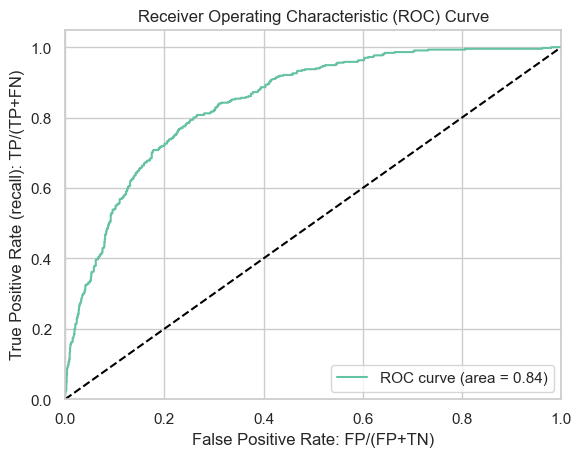

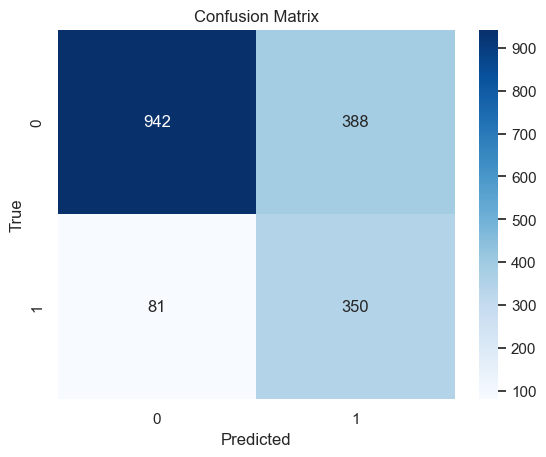

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1330
           1       0.47      0.81      0.60       431

    accuracy                           0.73      1761
   macro avg       0.70      0.76      0.70      1761
weighted avg       0.81      0.73      0.75      1761



In [507]:

parameters = {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
model = GradientBoostingClassifier(**parameters)
result = model.fit(X_undersampled, y_undersampled)
y_pred = result.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(f"ROC_AUC_score:{roc_auc_score(y_test, y_pred_proba)}")
print(f"accuracy_score:{accuracy_score(y_test, y_pred)}")
print(f"precision_score:{precision_score(y_test, y_pred)}")
print(f"recall_score:{recall_score(y_test, y_pred)}")
print(f"f1_score:{f1_score(y_test, y_pred)}")


roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate: FP/(FP+TN)')
plt.ylabel('True Positive Rate (recall): TP/(TP+FN)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure()
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test,y_pred)) 

In [508]:
# accuracy
(915+405)/(915+405+80+361)

0.7495741056218058

In [509]:
#Precision = TruePositives / (TruePositives + FalsePositives)
#The FalsePositives are relatively high

406/(406+351)

0.5363276089828269

In [510]:
# Recall = TruePositives / (TruePositives + FalseNegatives)

406/(406+79)



0.8371134020618557

In [511]:
model_df.to_csv("model_df.csv")